In [1]:
from parameter_optimizer import optimize_parameters, plot_parameter_sensitivity
from strategies.opening_range_breakout.variant_1 import opening_range_breakout as variant_1_strategy
from strategies.opening_range_breakout.variant_2 import opening_range_breakout as variant_2_strategy


In [2]:
tester_config = {
    'symbols': ['SPY'],
    'start_date': (2018, 1, 1),
    'end_date': (2018, 12, 31),
    # 'end_date': (2021, 1, 1),
    'initial_cash': 10000,
    'resolution': 'minute'
}

param_grid_1 = {
    'opening_range_minutes': [30, 60, 90, 120],
    'breakout_buffer': [0.2, 0.4, 1],
    'reversion_multiple': [0.3, 0.5, 1], #variant 1
    # 'reversion_multiple': [0.01, 0.03, 0.05], #variant 2
    'max_positions': [1],
    'exit_time': ['15:45']
}

param_grid_2 = {
    'opening_range_minutes': [30, 60, 90, 120],
    'breakout_buffer': [0.2, 0.4, 1],
    # 'reversion_multiple': [0.3, 0.5, 0.75], #variant 1
    'reversion_multiple': [0.01, 0.03, 0.05], #variant 2
    'max_positions': [1],
    'exit_time': ['15:45']
}


In [3]:

results_1 = optimize_parameters(
    tester_config,
    variant_1_strategy,
    param_grid_1,
    metric='sharpe_ratio'
)


▶ Coordinate Descent Optimization
   Optimizing for: sharpe_ratio
   Parameters: opening_range_minutes, breakout_buffer, reversion_multiple, max_positions, exit_time
   Initial defaults: {'opening_range_minutes': 90, 'breakout_buffer': 0.4, 'reversion_multiple': 0.5, 'max_positions': 1, 'exit_time': '15:45'}

--- Pass 1 ---
  Optimizing opening_range_minutes... 
 
▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

best = 90 (sharpe_ratio = 0.9014)

  Optimizing breakout_buffer... 
 
▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

best = 0.4 (sharpe_ratio = 0.9014)

  Optimizing reversion_multiple... 
 
▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

best = 1.0 (sharpe_ratio = 1.5636)

  Optimizing max_positions... 
 
best = 1 (sharpe_ratio = 1.5636)

  Optimizing exit_time... 
 
best = 15:45

In [4]:
results_2 = optimize_parameters(
    tester_config,
    variant_2_strategy,
    param_grid_2,
    metric='sharpe_ratio'
)


▶ Coordinate Descent Optimization
   Optimizing for: sharpe_ratio
   Parameters: opening_range_minutes, breakout_buffer, reversion_multiple, max_positions, exit_time
   Initial defaults: {'opening_range_minutes': 90, 'breakout_buffer': 0.4, 'reversion_multiple': 0.03, 'max_positions': 1, 'exit_time': '15:45'}

--- Pass 1 ---
  Optimizing opening_range_minutes... 
 
▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

best = 90 (sharpe_ratio = 1.0998)

  Optimizing breakout_buffer... 
 
▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

best = 1.0 (sharpe_ratio = 2.4113)

  Optimizing reversion_multiple... 
 
▶ Running backtest...
✓ Backtest complete

▶ Running backtest...
✓ Backtest complete

best = 0.03 (sharpe_ratio = 2.4113)

  Optimizing max_positions... 
 
best = 1 (sharpe_ratio = 2.4113)

  Optimizing exit_time... 
 
best = 15:

In [5]:
# View top 10 results
print("\nTop 10 Parameter Combinations:")
results_1[['opening_range_minutes', 'breakout_buffer', 'reversion_multiple', 
               'max_positions', 'exit_time',
               'sharpe_ratio', 'total_return', 'max_drawdown', 'win_rate']].head(10)



Top 10 Parameter Combinations:


,opening_range_minutes,breakout_buffer,reversion_multiple,max_positions,exit_time,sharpe_ratio,total_return,max_drawdown,win_rate
21,30,1.0,1.0,1,15:45,2.738712,0.109696,-0.022830,0.487654
20,60,1.0,1.0,1,15:45,2.685880,0.082395,-0.037838,0.485981
15,60,1.0,0.3,1,15:45,2.501182,0.045262,-0.018440,0.429907
13,90,1.0,0.3,1,15:45,2.375025,0.030064,-0.022459,0.385714
12,90,1.0,1.0,1,15:45,2.273242,0.050258,-0.044387,0.400000
24,30,1.0,0.5,1,15:45,2.161166,0.054972,-0.022755,0.450617
14,30,1.0,0.3,1,15:45,2.085994,0.040635,-0.013933,0.413580
16,120,1.0,0.3,1,15:45,1.711924,0.014155,-0.021739,0.380952
22,120,1.0,1.0,1,15:45,1.614776,0.024237,-0.030208,0.380952
7,90,0.4,1.0,1,15:45,1.563599,0.091299,-0.059761,0.537037


In [6]:
# View top 10 results
print("\nTop 10 Parameter Combinations:")
results_2[['opening_range_minutes', 'breakout_buffer', 'reversion_multiple', 
               'max_positions', 'exit_time',
               'sharpe_ratio', 'total_return', 'max_drawdown', 'win_rate']].head(10)



Top 10 Parameter Combinations:


,opening_range_minutes,breakout_buffer,reversion_multiple,max_positions,exit_time,sharpe_ratio,total_return,max_drawdown,win_rate
12,60,1.0,0.01,1,15:45,2.800855,0.102766,-0.043763,0.551402
9,60,1.0,0.03,1,15:45,2.798598,0.112587,-0.050706,0.588785
13,60,1.0,0.05,1,15:45,2.750360,0.111247,-0.051892,0.588785
14,30,1.0,0.01,1,15:45,2.686633,0.161272,-0.037807,0.549383
7,90,1.0,0.05,1,15:45,2.411257,0.058253,-0.046818,0.457143
5,90,1.0,0.03,1,15:45,2.411257,0.058253,-0.046818,0.457143
8,30,1.0,0.03,1,15:45,2.314957,0.160419,-0.056073,0.574074
10,120,1.0,0.03,1,15:45,1.991344,0.031837,-0.034230,0.428571
6,90,1.0,0.01,1,15:45,1.743332,0.043124,-0.042913,0.442857
16,60,0.2,0.01,1,15:45,1.543552,0.131454,-0.046595,0.513514


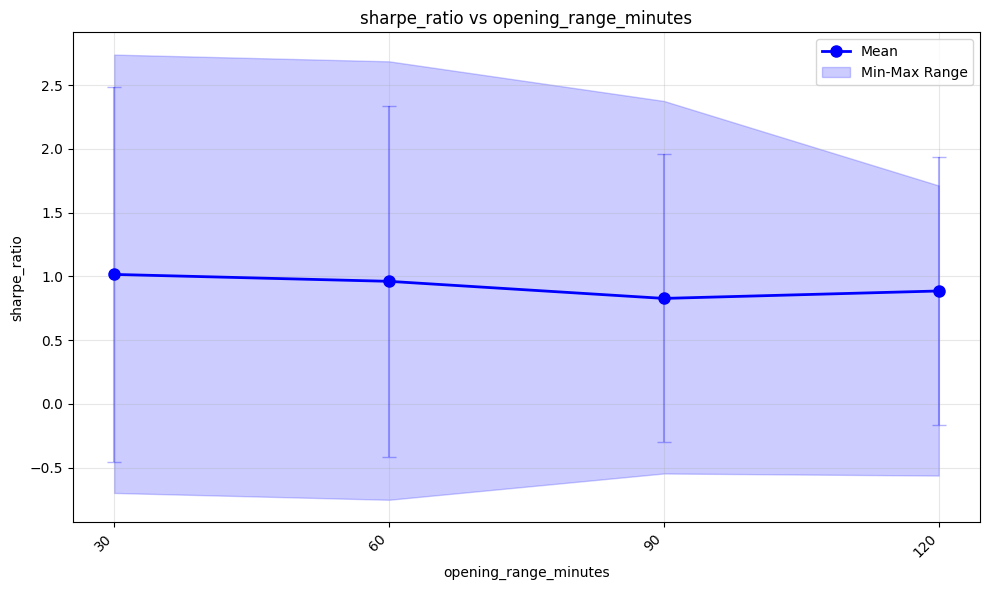

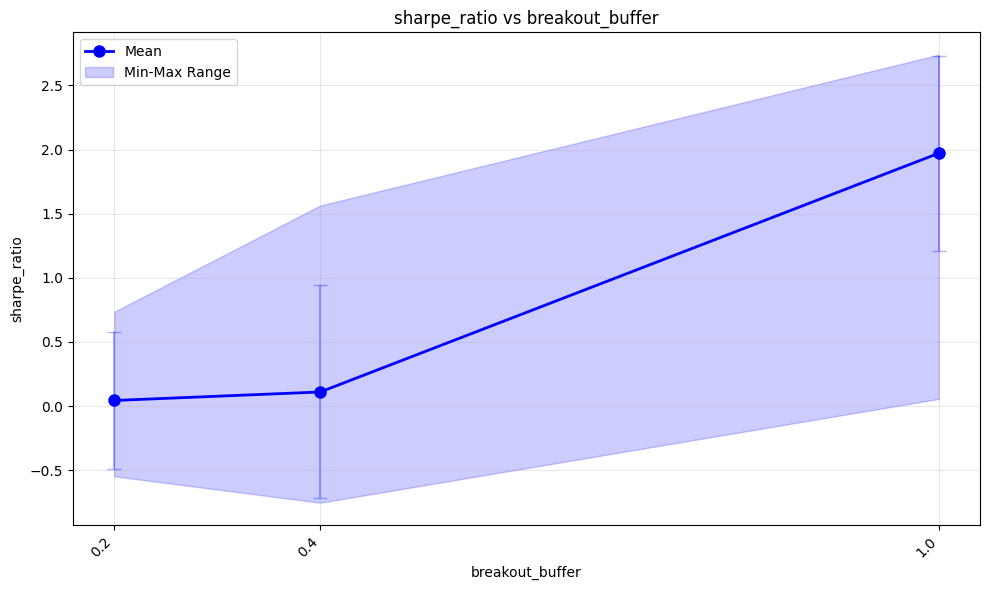

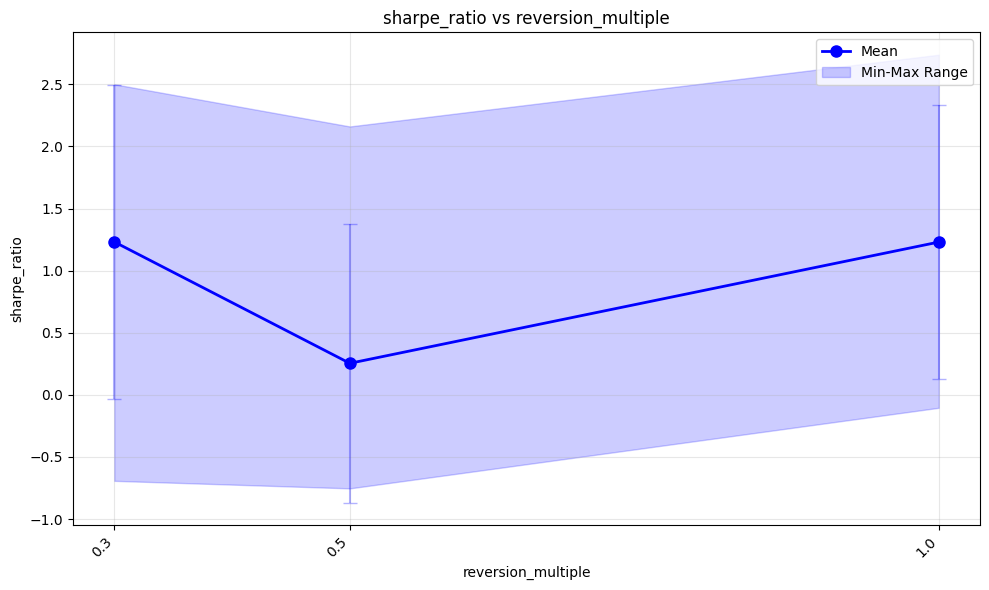

In [9]:
plot_parameter_sensitivity(results_1, 'opening_range_minutes', 'sharpe_ratio')
plot_parameter_sensitivity(results_1, 'breakout_buffer', 'sharpe_ratio')
plot_parameter_sensitivity(results_1, 'reversion_multiple', 'sharpe_ratio')

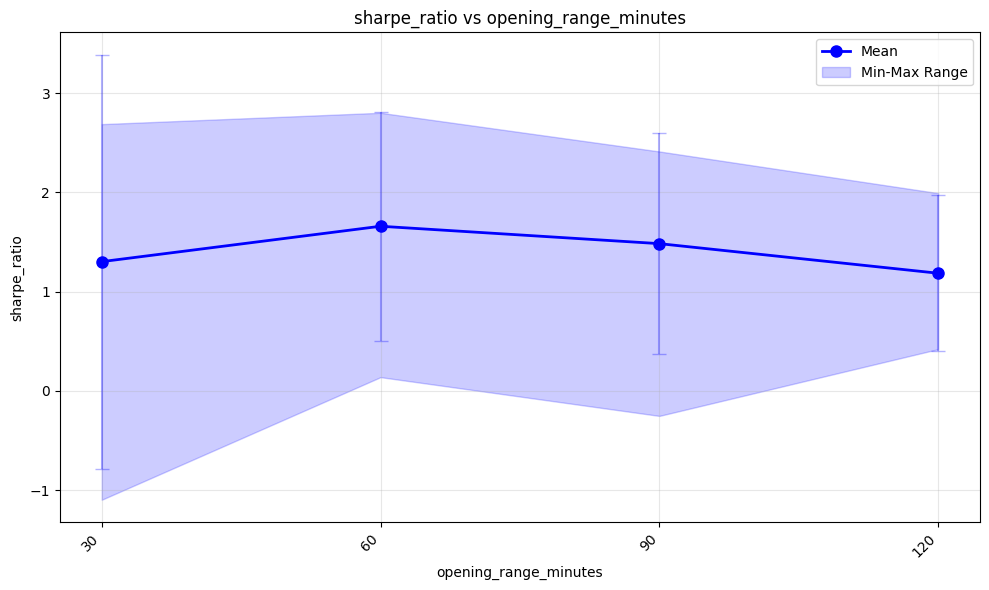

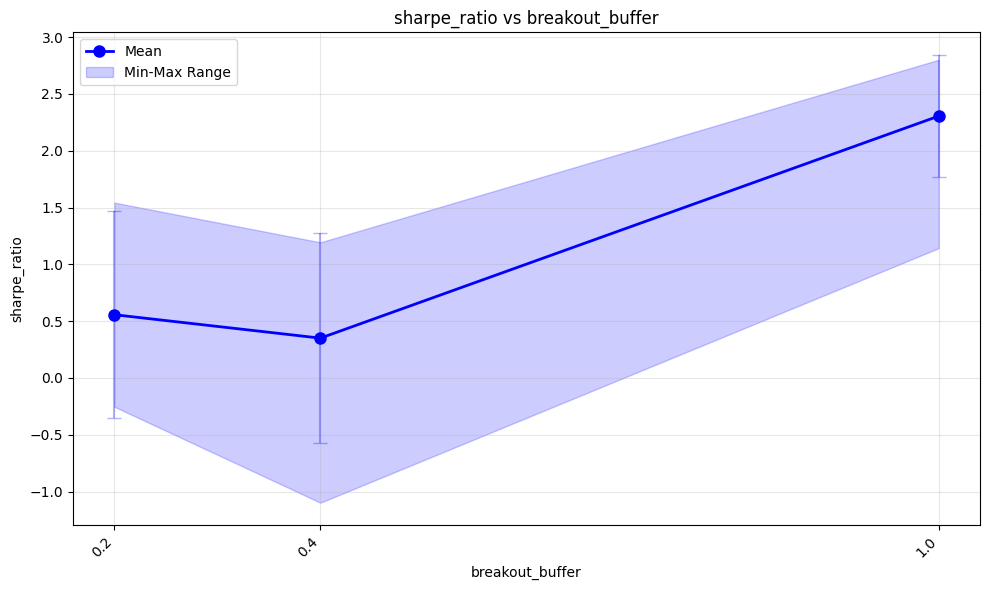

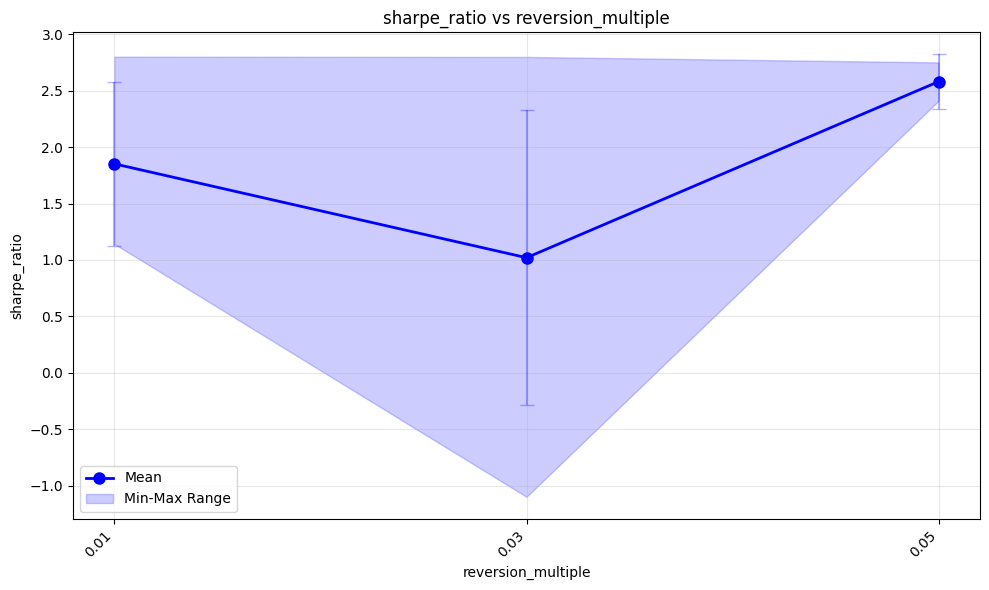

In [ ]:
plot_parameter_sensitivity(results_2, 'opening_range_minutes', 'sharpe_ratio')
plot_parameter_sensitivity(results_2, 'breakout_buffer', 'sharpe_ratio')
plot_parameter_sensitivity(results_2, 'reversion_multiple', 'sharpe_ratio')

### Observations

- reversion_multiple doesn't have a big impact which is a good sign

- Same for opening_range_multiple

- Increasing the breakout buffer seems to lead to better performance. Intuition: we only catch signals with a great trend signal 

- The variant 2 slightly perform better than the variant 1 overall so we will keep working with it
    - Higher total return
    - Higher sharpe ratio
    - Higher win rate
    - But Higher max drawdown (careful)


### Next steps:

- Retry a param optimization with higher values of breakout buffer for variant 2
- fix the others params to: 
    - opening_range_minutes: 30 (slightly smaller sharpe ratio but much higher total return)
    - reversion_multiple: 0.01 (performance are overall similar but it reduce max drawdown)

- Have an in depth observations of params of returns and compare them to the baseline (raw return of SPY 500)